# Drinking water potability

In [1]:

# Import necessary dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')
import pickle as pk
import os

2024-07-03 20:48:22.596658: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 20:48:22.596796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 20:48:22.778961: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load dataset
df = pd.read_csv('PrepareModel\water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Exploratory Data Analysis

In [3]:
# Describe dataset 
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.shape

(3276, 10)

In [5]:
# Show some statistical info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Data Cleaning

In [6]:
# Check about missing values to decide if I will make data cleaning or not
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
# Clean ph, Sulfate and Trihalomethanes columns 
df = df.fillna(df.mean())

In [8]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
# Group features by the Potability column 
df.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.084658,196.733292,21777.490788,7.092175,334.371700,426.730454,14.364335,66.308522,3.965800
1,7.074754,195.800744,22383.991018,7.169338,332.844122,425.383800,14.160893,66.533513,3.968328


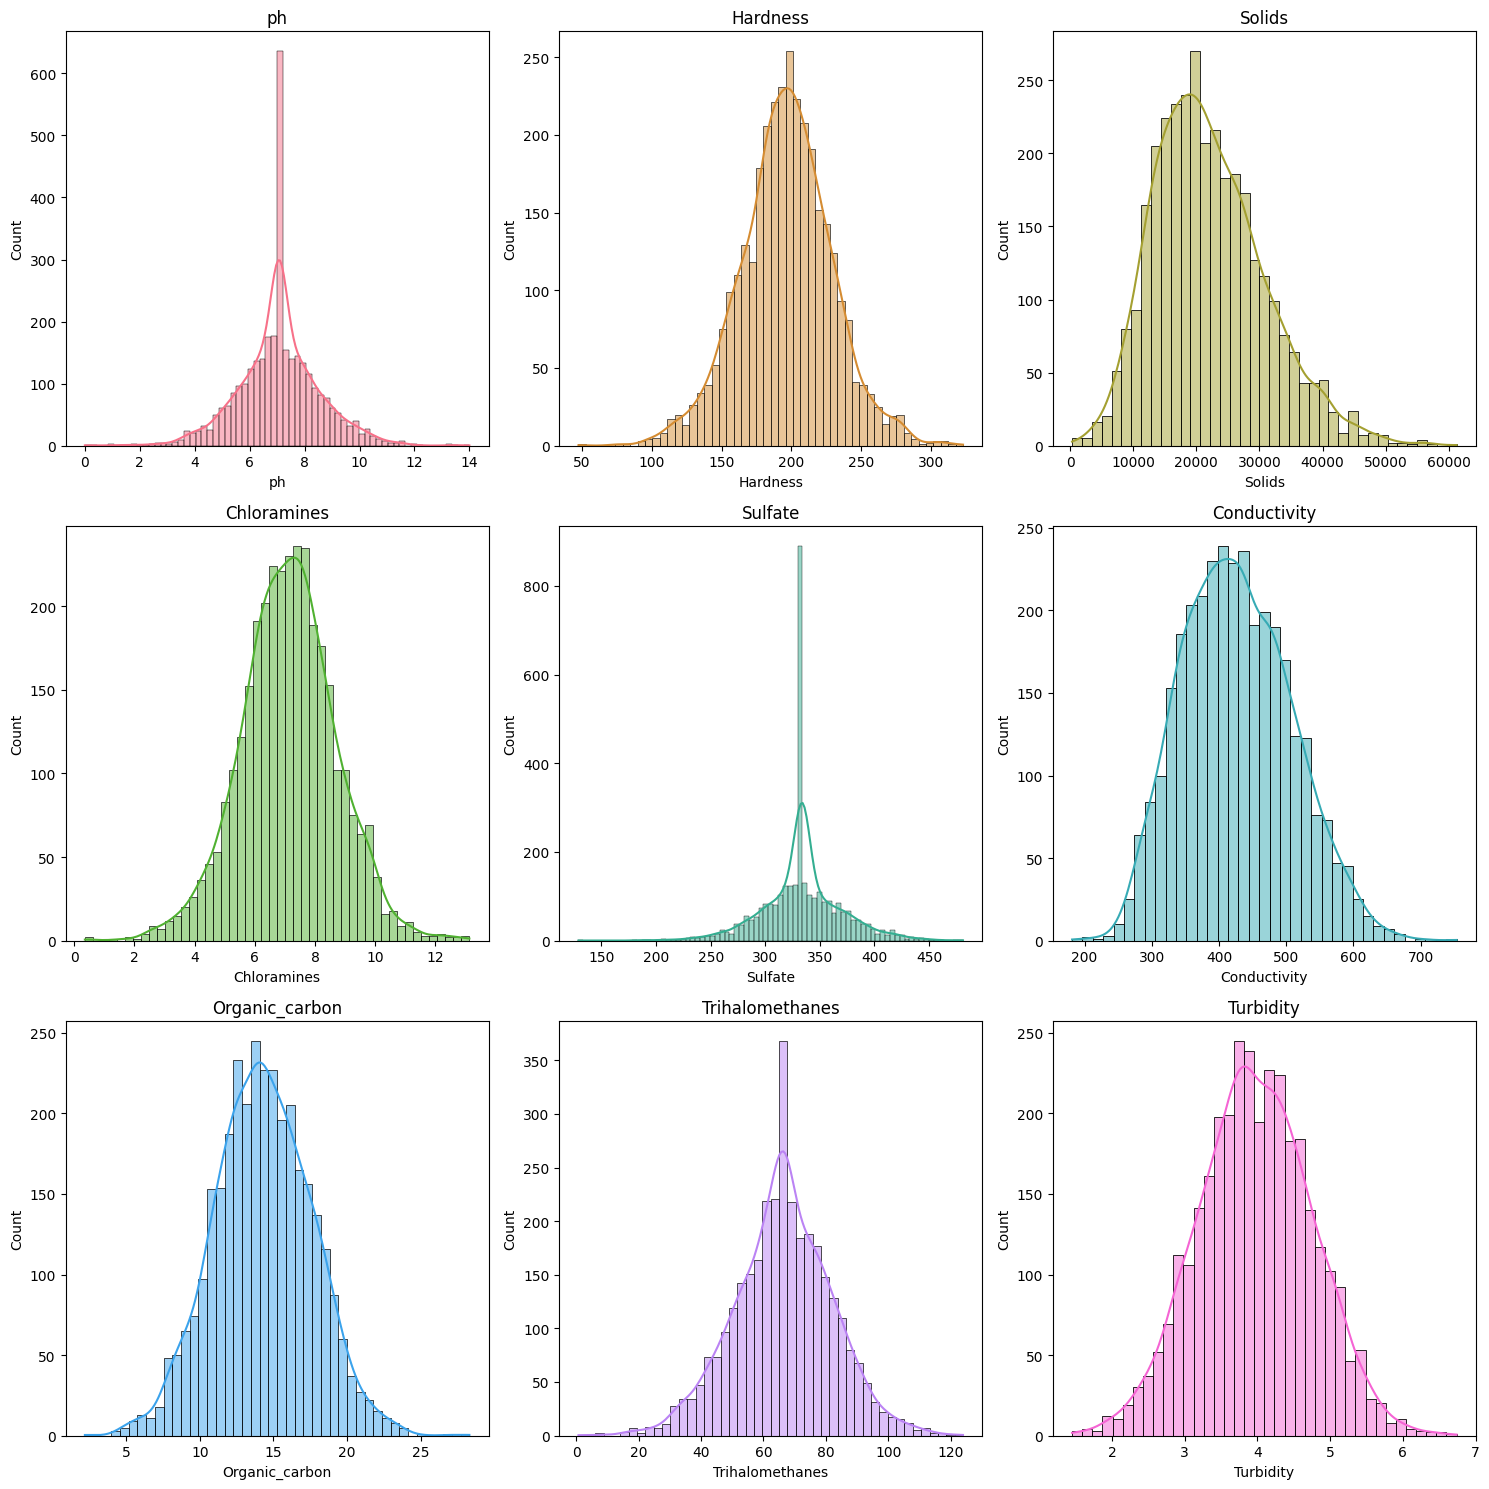

In [10]:
# Plot distribution for all columns except Potability
plt.figure(figsize=(15, 15))
colors = sns.color_palette('husl', n_colors=len(df.columns) - 1)
for i, (col, color) in enumerate(zip(df.columns.drop('Potability'), colors)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color=color)
    plt.title(col)
plt.tight_layout()
plt.show()

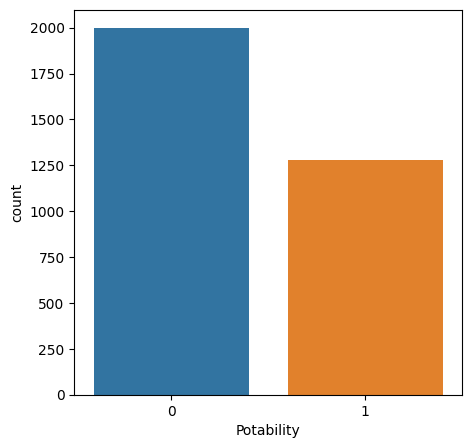

Potability
0    1998
1    1278
Name: count, dtype: int64


In [11]:
# Count values of Potability column
plt.figure(figsize = (5,5))
sns.countplot(x = 'Potability' ,data = df)
plt.show()
count_values = df['Potability'].value_counts()
print(count_values)

In [12]:
# Create correlation between all columns 
correlation = df.corr()
correlation

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


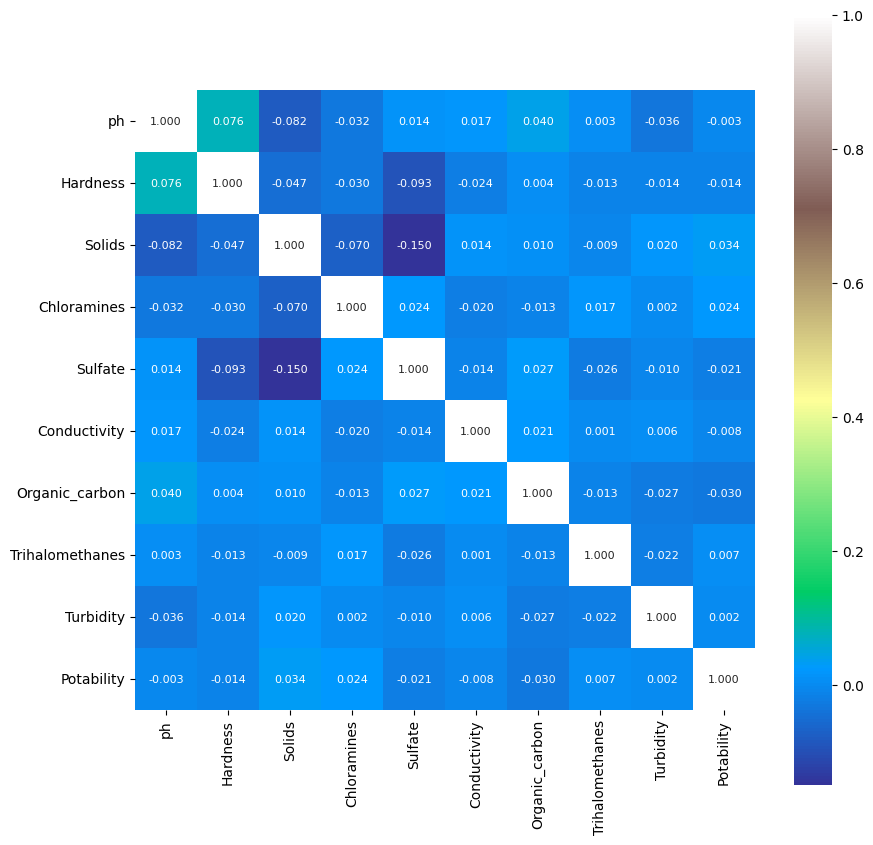

In [13]:
# Visualize correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.3f', annot=True, annot_kws={'size':8}, cmap='terrain')
plt.show()

<Axes: >

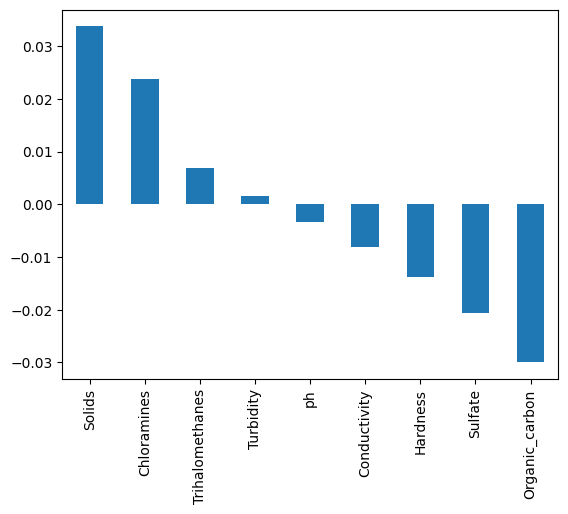

In [14]:
correlation['Potability'].drop('Potability').sort_values(ascending = False).plot(kind = 'bar')

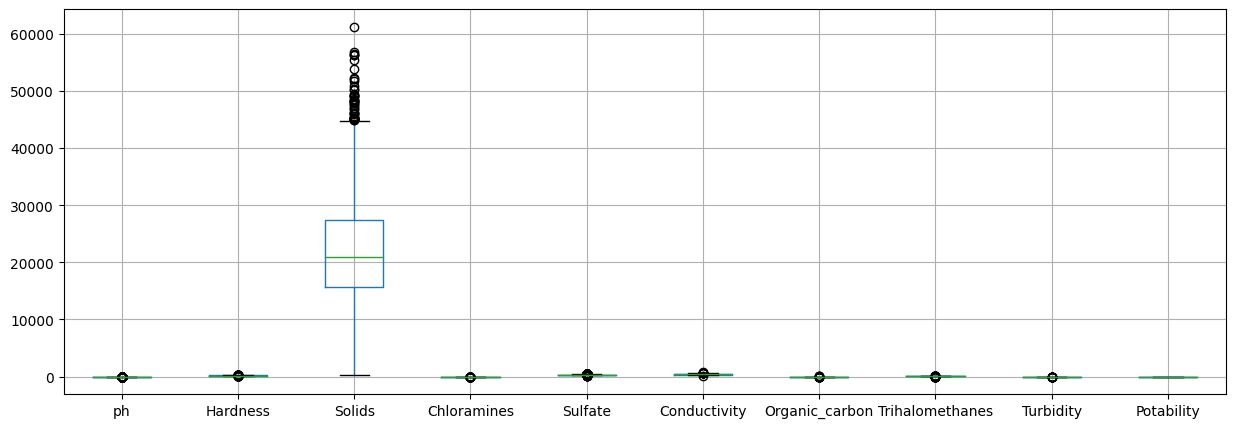

In [15]:
# Box plot dataset
df.boxplot(figsize = (15,5))
plt.show()

In [16]:
# Build function to find the percentage of column outliers
def outlier_percentage(data):

  # Find standard deviation and mean of the data
  std = np.std(data)
  mean = np.mean(data)

  # Define cut-off
  outlier_cut_off = 3 * std

  # Find lower and upper limits of the data
  lower_limit = mean - outlier_cut_off
  upper_limit = mean + outlier_cut_off

  # Find outliers
  outliers = data[(data < lower_limit) | (data > upper_limit)]

  # Calculate percentage of outliers
  outliers_percentage = (len(outliers) / len(data)) * 100

  return outliers_percentage

In [17]:
# Show percentage
Solids_outliers_percentage = outlier_percentage(df['Solids'])
print(f"Percentage of outliers: {Solids_outliers_percentage:.2f}%\n")
# describe Solids column
print(df['Solids'].describe(), end = '\n\n')
# Show skew of the column
print(f"the skew of Solids column is {df['Solids'].skew()}")

Percentage of outliers: 0.61%

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

the skew of Solids column is 0.6216344855169127


In [18]:
# Transform column by take the log for the values
df['Solids'] = np.log(df['Solids'])

In [19]:
# Show percentage
Solids_outliers_percentage = outlier_percentage(df['Solids'])
print(f"Percentage of outliers: {Solids_outliers_percentage:.2f}%\n")
# describe Solids column
print(df['Solids'].describe(), end = '\n\n')
# Show skew of the column
print(f"the skew of Solids column is {df['Solids'].skew()}")

Percentage of outliers: 1.01%

count    3276.000000
mean        9.911882
std         0.445434
min         5.771262
25%         9.659292
50%         9.948835
75%        10.215841
max        11.022347
Name: Solids, dtype: float64

the skew of Solids column is -1.1358113074915426


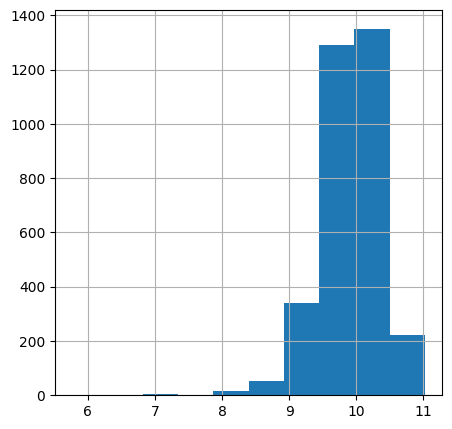

In [20]:
# Plot the distribution after transformation
df['Solids'].hist(figsize = (5,5))
plt.show()

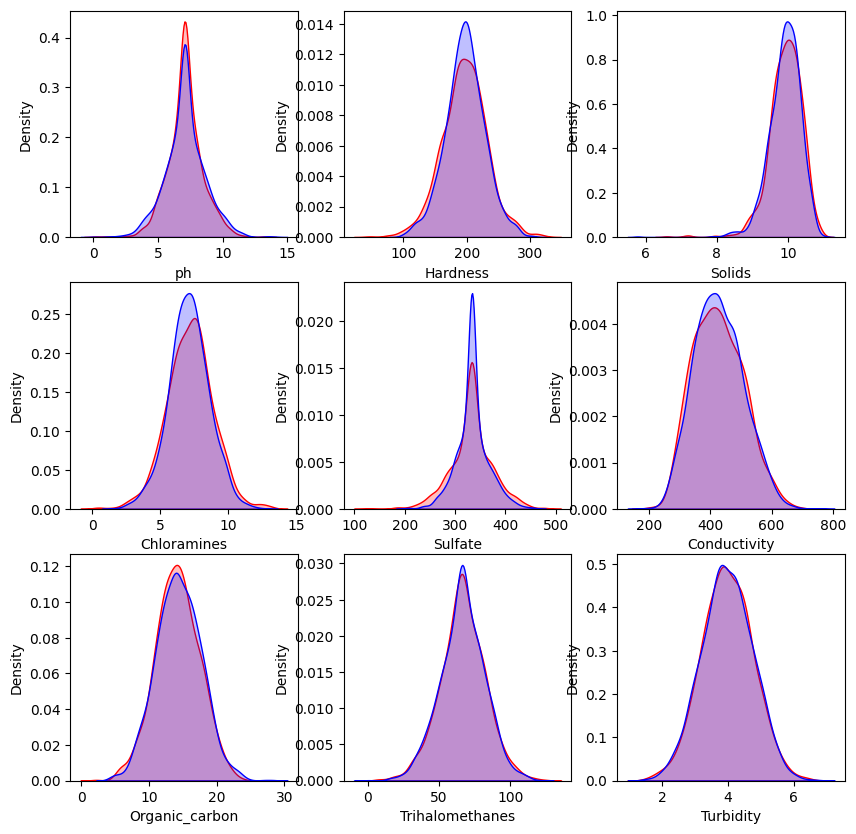

In [21]:
# Plot Kernel Density Estimate (KDE) when Potability is 1 and 0
plt.figure(figsize = (10,10))
for i, col in enumerate(df.columns.drop('Potability')):
  plt.subplot(3, 3, i+1)
  sns.kdeplot(df[col][df['Potability']==1], shade = True, label = col, color = 'Red')
  sns.kdeplot(df[col][df['Potability']==0], shade = True, label = col, color = 'Blue')
plt.show()

# Modeling with classic and ensemble algorithms

In [22]:
# Split data into input and label data
X = df.drop(columns = ['Potability'], axis = 1)
Y = df['Potability']
print(f'x shape {X.shape}, y shape {Y.shape}')

x shape (3276, 9), y shape (3276,)


In [23]:
# Split data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [24]:
# Create function to plot the predicted values vs actual values
def model_functionality(model):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    # Create confusion matrix and classification report
    cm_result = confusion_matrix(Y_test, y_pred)
    cr_result = classification_report(Y_test, y_pred)

    return model, accuracy_score(Y_test, y_pred), cm_result, cr_result

In [25]:
# Create models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

Logistic Regression with accuracy: 62.19512195121951% and confusion matrix:


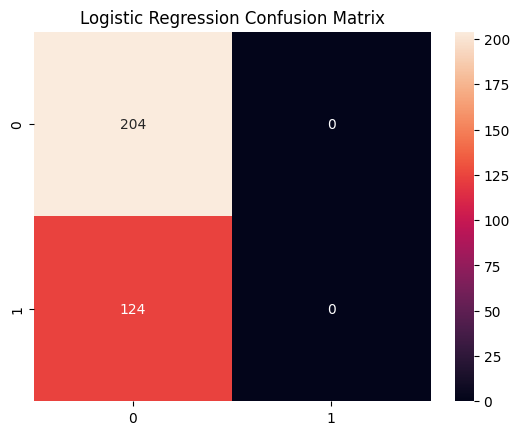

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       204
           1       0.00      0.00      0.00       124

    accuracy                           0.62       328
   macro avg       0.31      0.50      0.38       328
weighted avg       0.39      0.62      0.48       328



Decision Tree with accuracy: 57.3170731707317% and confusion matrix:


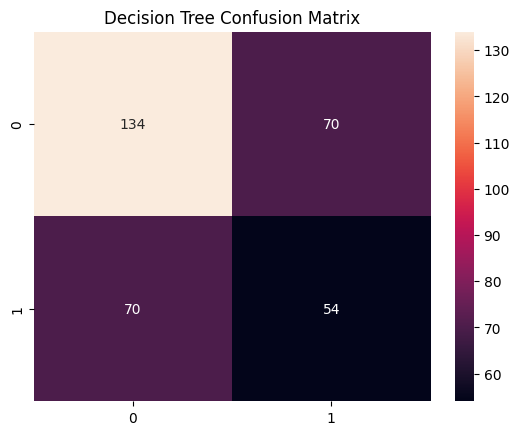

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       204
           1       0.44      0.44      0.44       124

    accuracy                           0.57       328
   macro avg       0.55      0.55      0.55       328
weighted avg       0.57      0.57      0.57       328



K-Nearest Neighbors with accuracy: 57.012195121951216% and confusion matrix:


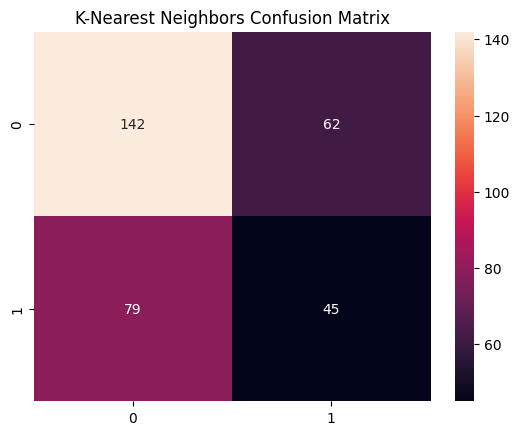

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       204
           1       0.42      0.36      0.39       124

    accuracy                           0.57       328
   macro avg       0.53      0.53      0.53       328
weighted avg       0.56      0.57      0.56       328



Random Forest with accuracy: 68.29268292682927% and confusion matrix:


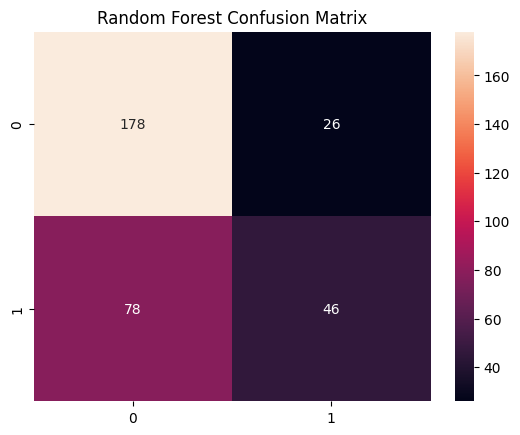

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       204
           1       0.64      0.37      0.47       124

    accuracy                           0.68       328
   macro avg       0.67      0.62      0.62       328
weighted avg       0.67      0.68      0.66       328



Gradient Boosting with accuracy: 65.85365853658537% and confusion matrix:


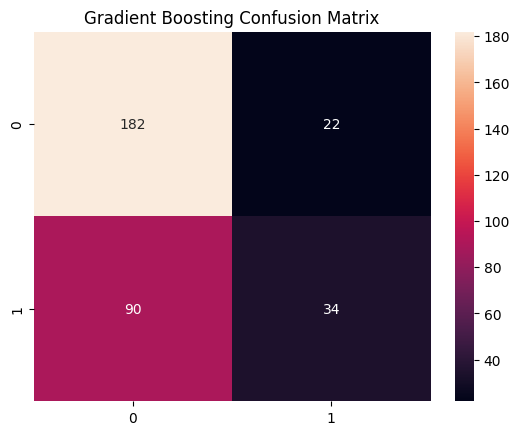

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       204
           1       0.61      0.27      0.38       124

    accuracy                           0.66       328
   macro avg       0.64      0.58      0.57       328
weighted avg       0.65      0.66      0.62       328





In [26]:
trained_models = {}
for name, model in models.items():
    trained_model, score, cm, cr = model_functionality(model)
    print(f'{name} with accuracy: {score * 100}% and confusion matrix:')
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    print(f'{name} Classification Report:')
    print(cr, end='\n\n\n')
    trained_models[name] = trained_model

# Modeling with DNN

In [27]:
# Create a more complex model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,713 (702.00 KB)

 Trainable params: 179,713 (702.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [30]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
# Fit the model with a validation split and early stopping
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.1, batch_size=32, callbacks=[early_stopping])

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4304 - loss: 39.6759 - val_accuracy: 0.5763 - val_loss: 3.1236
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4900 - loss: 16.6865 - val_accuracy: 0.5763 - val_loss: 1.3630
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4969 - loss: 12.0816 - val_accuracy: 0.5695 - val_loss: 1.2725
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5031 - loss: 9.8737 - val_accuracy: 0.4949 - val_loss: 1.2580
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4959 - loss: 7.8300 - val_accuracy: 0.4203 - val_loss: 1.2704
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5043 - loss: 6.6429 - val_accuracy: 0.4237 - val_loss: 1.2616
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4885 - loss: 6.0554 - val_accuracy: 0.4136 - val_loss: 1.2362
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5096 - loss: 4.7656 - val_accuracy: 0.5932 - val_l

In [32]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - loss: 1.1841 
Loss: 1.1891, Accuracy: 62.20%


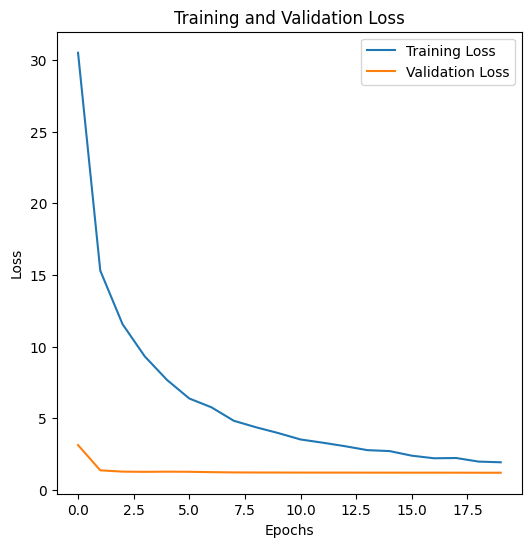

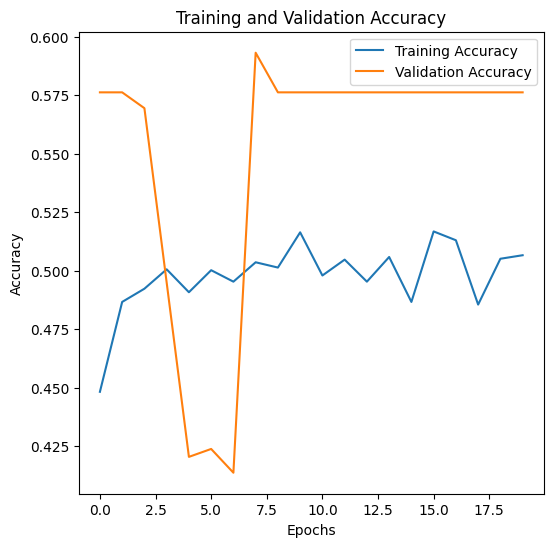

In [33]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

# Hyperparameters Tuning

In [ ]:
# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 200),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', 'auto']
}

# Create the model
model = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(model, param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, Y_train)

In [35]:
# Get the best estimator from Randomized Search
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f'Best score from RandomizedSearchCV: {best_score}')
print(f'Best parameters from RandomizedSearchCV: {best_params}')

Best score from RandomizedSearchCV: 0.6774112975166183
Best parameters from RandomizedSearchCV: {'max_depth': 79, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 863}


In [36]:
# Define a more refined parameter grid for GridSearchCV based on the results of RandomizedSearchCV
param_grid = {
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'max_depth': [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth'] + 10],
    'min_samples_split': [best_params['min_samples_split'] - 1, best_params['min_samples_split'], best_params['min_samples_split'] + 1],
    'min_samples_leaf': [best_params['min_samples_leaf'] - 1, best_params['min_samples_leaf'], best_params['min_samples_leaf'] + 1],
    'max_features': [best_params['max_features']]
}

# Perform Grid Search
grid_search = GridSearchCV(best_estimator, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=79, min_samples_leaf=3,
                                              min_samples_split=5,
                                              n_estimators=863,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [69, 79, 89], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [813, 863, 913]},
             scoring='accuracy')

In [37]:
# Get the best estimator from Grid Search
best_grid_estimator = grid_search.best_estimator_
best_grid_params = grid_search.best_params_
best_grid_score = grid_search.best_score_

In [38]:
print(f'Best score from GridSearchCV: {best_grid_score}')
print(f'Best parameters from GridSearchCV: {best_grid_params}')

Best score from GridSearchCV: 0.6774112975166183
Best parameters from GridSearchCV: {'max_depth': 69, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 863}


In [39]:
# Train the best model on the full training data and evaluate it
best_model = best_grid_estimator.fit(X_train, Y_train)
final_score = best_model.score(X_test, Y_test)

print(f'Final model accuracy on test data: {final_score}')

Final model accuracy on test data: 0.7012195121951219


In [40]:
# Find confusion matrix and classification report
y_pred_grid = best_model.predict(X_test)
cm_grid = confusion_matrix(y_pred_grid, Y_test)
cr_grid = classification_report(y_pred_grid, Y_test)

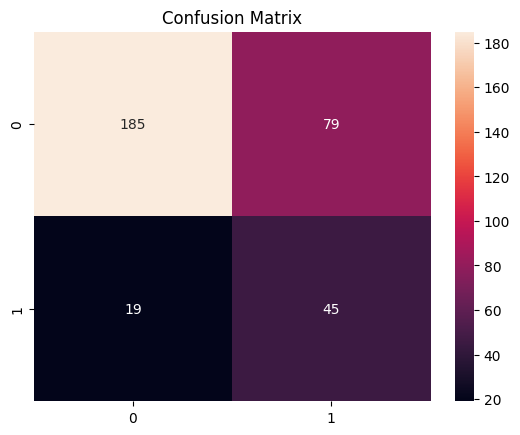

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       264
           1       0.36      0.70      0.48        64

    accuracy                           0.70       328
   macro avg       0.63      0.70      0.63       328
weighted avg       0.80      0.70      0.73       328



In [41]:
# Plot confusion matrix 
sns.heatmap(cm_grid, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()
print('Classification Report:')
print(cr_grid)

## The best model so far is the Random Forest model that resulted from hyperparameter tuning with accuracy 70%.

In [ ]:
# File path for the model
model_path = 'rf_tuned_model.sav'

# Check if the file exists before saving
if not os.path.exists(model_path):
    with open(model_path, 'wb') as model_file:
        pk.dump(best_estimator, model_file)

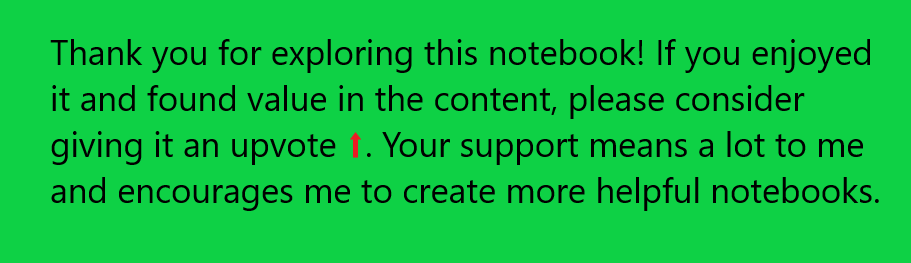